In [1]:
category_map = {'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [2]:
categories = list(category_map.values())

In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')
sentence_embeddings = model.encode(categories)

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(
    [sentence_embeddings[0]],
    sentence_embeddings[1:]
)

array([[0.478328  , 0.57243145, 0.46027145, 0.5126269 , 0.5335945 ,
        0.4894122 , 0.5330754 , 0.62798244, 0.40581167, 0.49269986,
        0.46310455, 0.3663055 , 0.5960612 , 0.518704  , 0.48246494,
        0.36486632, 0.7205035 , 0.7831292 , 0.5285687 , 0.45346963,
        0.49269986, 0.60965645, 0.5350882 , 0.43002206, 0.52149355,
        0.3940826 , 0.49503195, 0.44395825, 0.5156801 , 0.54598445,
        0.55421543]], dtype=float32)

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(sentence_embeddings).transpose()
df.columns = categories
df

,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Documentary,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers
0,0.586917,0.524223,0.093196,0.637868,0.856534,0.490505,0.056604,0.347269,0.752793,0.401971,...,0.495654,-0.071029,-0.211509,-0.021597,0.597711,0.104855,0.066644,0.723647,0.186874,0.486467
1,0.321487,0.451693,-0.689573,-0.862099,-0.479107,0.040914,-0.897500,-0.190971,-0.316961,0.382026,...,-0.263967,-0.906050,-0.284111,-0.333700,0.009232,-0.575504,-0.194962,-0.696057,-0.483832,0.236530
2,1.434571,1.658460,2.401302,1.535065,1.909115,0.846896,2.771842,2.462371,1.785983,1.543065,...,1.499125,1.853013,2.076344,2.046876,1.837321,1.916263,1.774692,1.065667,2.693417,2.086608
3,0.242706,0.059266,0.743293,0.141146,0.632280,0.617615,0.724456,0.451005,0.559030,0.103811,...,0.383463,0.663824,-0.028940,0.375774,0.544419,0.497502,0.188559,0.198896,0.814825,0.097735
4,0.449451,-0.323782,-0.164935,0.403548,-0.329138,0.126435,0.463749,-0.020289,0.002496,-0.171474,...,0.357913,-0.576751,-0.041545,0.258907,-0.145873,0.583435,0.207072,0.666856,-0.258490,-0.214741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.541027,-0.862612,-0.406774,-0.346171,-0.077548,0.263871,-0.505732,0.020408,0.165405,-0.651952,...,-0.281949,-0.495568,-1.210081,-0.564336,-0.112558,-0.101101,-0.413219,-0.307024,-0.435637,0.017967
764,0.241055,0.745230,0.199962,0.204628,0.108287,-0.088763,-0.180660,0.741364,0.071890,0.052348,...,-0.031262,-0.253115,-0.005415,0.346901,-0.183924,0.116977,0.220981,-0.062492,0.485862,0.167096
765,0.217990,-1.124624,0.468630,0.545033,0.369273,0.637613,-1.116663,-0.494371,0.531270,-0.452540,...,0.258740,-0.476190,-0.185147,-0.412484,-0.467506,-0.964631,-0.896133,0.635273,0.194022,0.349840
766,0.767438,-0.625008,-0.374422,-0.032210,-0.442831,0.800711,-0.461777,-0.201021,0.047240,-0.035192,...,0.567806,0.043266,-0.308373,-0.393627,0.326245,0.340723,0.377844,0.172943,0.179691,0.218209


In [7]:
corr = df.corr()
corr

,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Documentary,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers
Film & Animation,1.000000,0.477866,0.572068,0.459806,0.512196,0.533209,0.488987,0.532667,0.627683,0.405308,...,0.609323,0.534718,0.429549,0.521067,0.393529,0.494552,0.443485,0.515271,0.545613,0.553841
Autos & Vehicles,0.477866,1.000000,0.529736,0.495738,0.521885,0.227973,0.620684,0.492955,0.493024,0.423196,...,0.470789,0.477915,0.396031,0.505854,0.327158,0.388534,0.394333,0.367781,0.523356,0.586745
Music,0.572068,0.529736,1.000000,0.510788,0.663586,0.398311,0.684750,0.643687,0.579045,0.511701,...,0.647440,0.704548,0.560948,0.691245,0.507617,0.563817,0.583134,0.563443,0.800447,0.554776
Pets & Animals,0.459806,0.495738,0.510788,1.000000,0.518783,0.320271,0.443864,0.448192,0.360806,0.353542,...,0.396895,0.404495,0.414277,0.477312,0.336675,0.318821,0.329754,0.425363,0.437463,0.555315
Sports,0.512196,0.521885,0.663586,0.518783,1.000000,0.392145,0.624329,0.697962,0.567148,0.432305,...,0.599301,0.593819,0.489868,0.646769,0.441969,0.422841,0.463441,0.614995,0.651201,0.535729
Short Movies,0.533209,0.227973,0.398311,0.320271,0.392145,1.000000,0.236883,0.463350,0.488879,0.269125,...,0.553767,0.475920,0.419358,0.473780,0.474652,0.458933,0.528239,0.680621,0.423093,0.456085
Travel & Events,0.488987,0.620684,0.684750,0.443864,0.624329,0.236883,1.000000,0.588413,0.481300,0.565365,...,0.562285,0.552331,0.523060,0.660435,0.373655,0.510204,0.466476,0.451485,0.715285,0.517565
Gaming,0.532667,0.492955,0.643687,0.448192,0.697962,0.463350,0.588413,1.000000,0.682765,0.483463,...,0.520094,0.617089,0.446008,0.584124,0.449717,0.602174,0.608578,0.478236,0.660043,0.496385
Videoblogging,0.627683,0.493024,0.579045,0.360806,0.567148,0.488879,0.481300,0.682765,1.000000,0.521444,...,0.612840,0.536467,0.373954,0.473023,0.455671,0.462356,0.465164,0.528861,0.609957,0.500877
People & Blogs,0.405308,0.423196,0.511701,0.353542,0.432305,0.269125,0.565365,0.483463,0.521444,1.000000,...,0.525989,0.475569,0.460663,0.427709,0.411017,0.486839,0.433795,0.398570,0.546229,0.383852


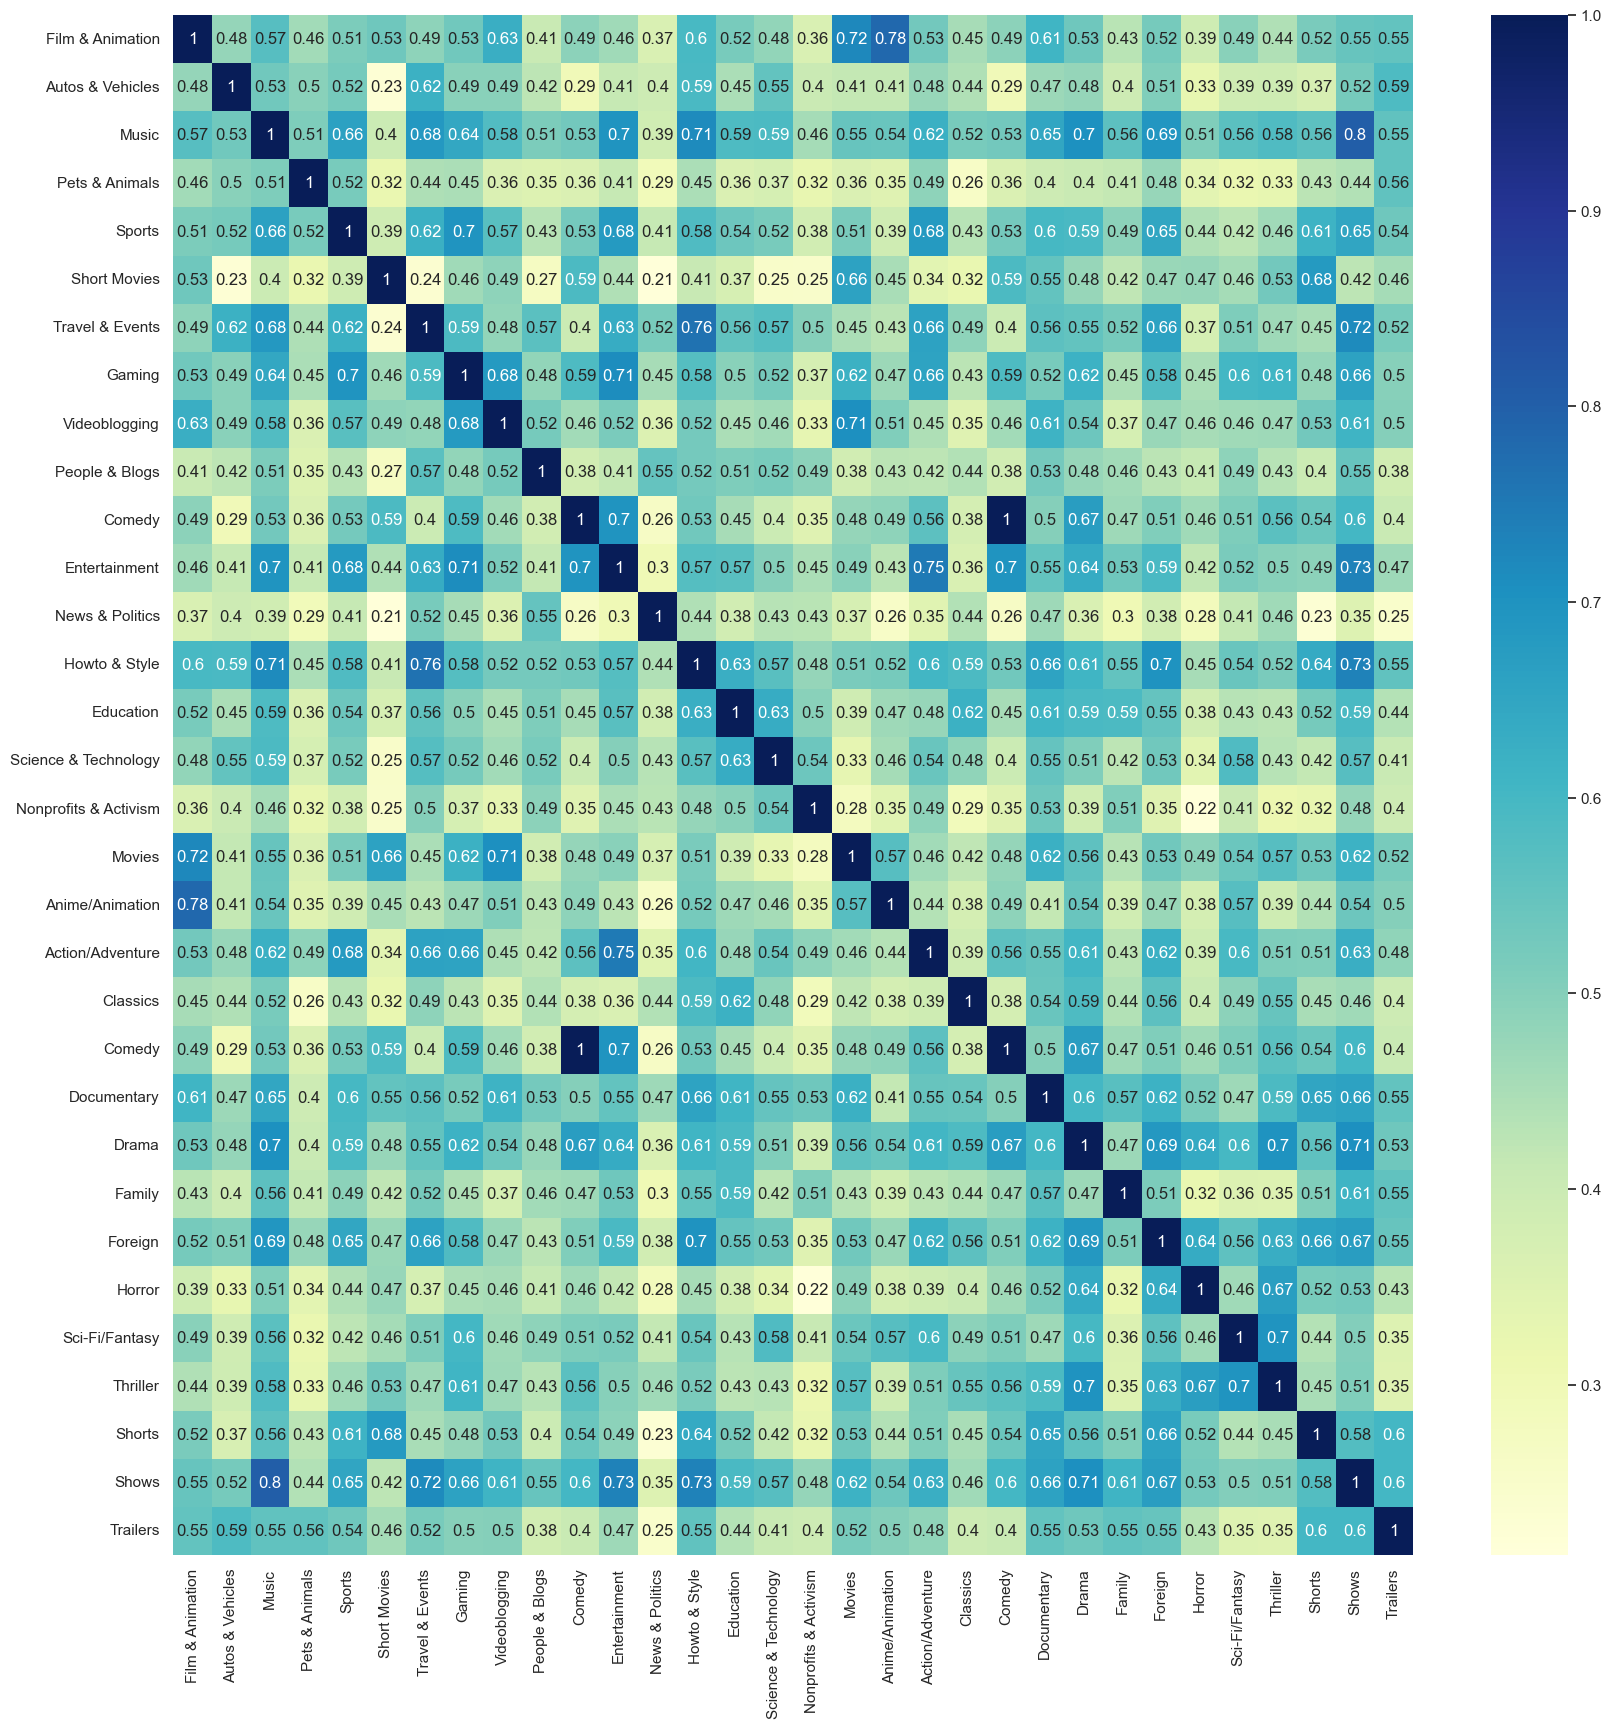

In [10]:
# import modules
import matplotlib.pyplot as mp
import seaborn as sb

sb.set(rc={'figure.figsize':(20, 20)})
dataplot = sb.heatmap(corr, cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()